# Job salaries analysis


## Data Dictionary and Metadata

Field | Type | ...
------|------|-----
work_year | int64 | Year of measure
experience_level | Category | MI, SE, EN, EX] (1)
employment_type | Category | FT, CT, PT, FL (2)
job_title | Category | Specific knowledge area: Data Scientist, Machine Learning Scientist, Big Data Engineer, ... 
salary| int64 | Yearly salary expressed in currency (salary_currency)
salary_currency| Category | Currency description (symbol): EUR, USD, GBP, ... (3)
salary_in_usd | int64 | Yearly salary expressed in USD (US Dollar)
employee_residence | Category | Location employee country (ISO code): DE, JP, GB, HN, US, ...
remote_ratio | int64 | This feature indicates the remote relation: 0: Face-to-Face, 50: Hybrid, 100: Full-remote; or 0% remote, 50% remote, 100% remote. 
company_location | Category | Location company country (ISO code): DE, JP, GB, HN, US, ... 
company_size| Category | S, M, L (4)


(1) Abbreviations of experience level (chatGPT):
* MI - Managerial/Intermediate: Positions at a mid-level of experience and responsibility, which may include managerial roles or leadership responsibilities.
* SE - Senior/Expert: Positions for individuals with significant experience and expertise in their respective roles.
* EN - Entry-Level: Positions suitable for individuals who are at the beginning of their careers or have minimal work experience in the field.
* EX - Executive/Executive-level: High-level leadership positions, often at the top of the organizational hierarchy, responsible for making strategic decisions and overseeing the data analysis function.

*It's important to note that these abbreviations might not be universally standardized, but they align with common interpretations of experience level categories in the context of data analysis jobs. When applying for jobs or reviewing job descriptions, it's always a good idea to read the full job description to understand the specific requirements and responsibilities associated with each role.*

(2) Abbreviations of employment types (chatGPT)

* FT - Full-Time: Full-time positions typically involve a standard work schedule of 35-40 hours per week, with benefits and job stability.
* CT - Contract: Contract positions involve a specific duration of employment or project-based work. Contractors are usually hired for a fixed period, and their employment ends when the contract expires.
* PT - Part-Time: Part-time positions involve working fewer hours per week compared to full-time positions. Part-time employees may receive some benefits, but they are generally prorated based on their work hours.
* FL - Freelance: Freelance positions are based on a project-by-project or contract basis. Freelancers work independently and are not employed by a specific company. They may have multiple clients and are responsible for managing their own taxes, benefits, and work arrangements.

*These abbreviations are commonly used in job postings to indicate the type of employment being offered for each data analysis role. As with any job application, it's essential to review the full job description and terms of employment to understand the specific details and expectations associated with each position.*

(3) Abbreviations of currency descriptions (chatGPT)

* EUR - € (Euro) - Eurozone countries
* USD - $ (United States Dollar) - United States
* GBP - £ (British Pound Sterling) - United Kingdom
* HUF - Ft (Hungarian Forint) - Hungary
* INR - ₹ (Indian Rupee) - India
* JPY - ¥ (Japanese Yen) - Japan
* CNY - ¥ (Chinese Yuan Renminbi) - China
* MXN - $ (Mexican Peso) - Mexico
* DKK - kr (Danish Krone) - Denmark
* PLN - zł (Polish Złoty) - Poland
* SGD - $ (Singapore Dollar) - Singapore
* CLP - $ (Chilean Peso) - Chile
* BRL - R$ (Brazilian Real) - Brazil
* TRY - ₺ (Turkish Lira) - Turkey
* AUD - $ (Australian Dollar) - Australia
* CHF - Fr (Swiss Franc) - Switzerland

(4) Abbreviations of company size

* S - Small
* M - Medium
* L - Large

*Haven't information about number of employees for each case*



## Imports and configs

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.version

'3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]'

## Load data

In [18]:
salaries_df = pd.read_csv('job_salaries.zip', compression='zip', index_col=[0])
display(salaries_df.shape, salaries_df.head())

(607, 11)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
id,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [19]:
# Cast to type category
category_features = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 
                     'employee_residence', 'remote_ratio', 'company_location', 'company_size']

salaries_df[category_features] = salaries_df[category_features].astype('category')

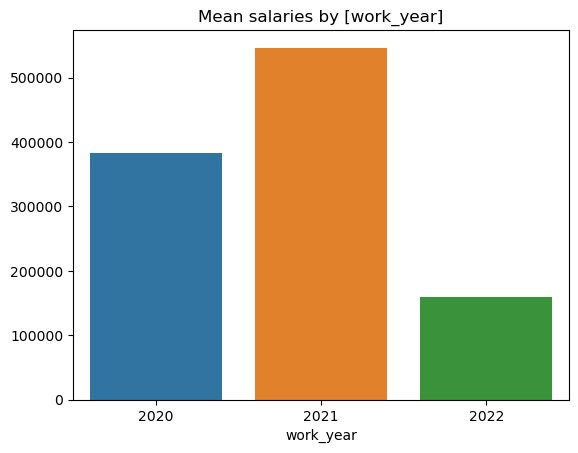

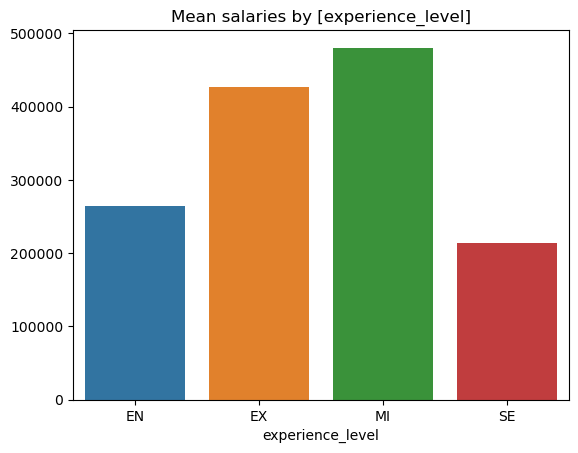

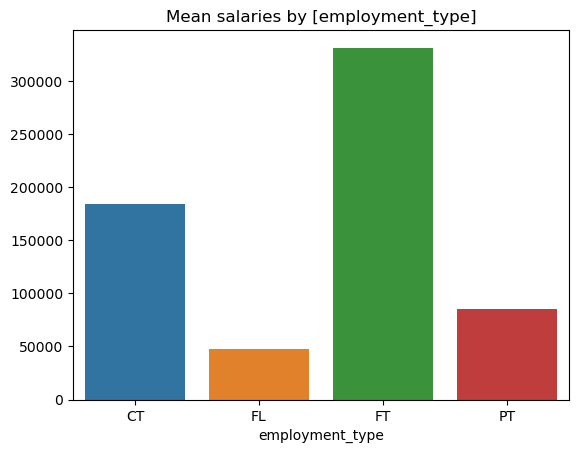

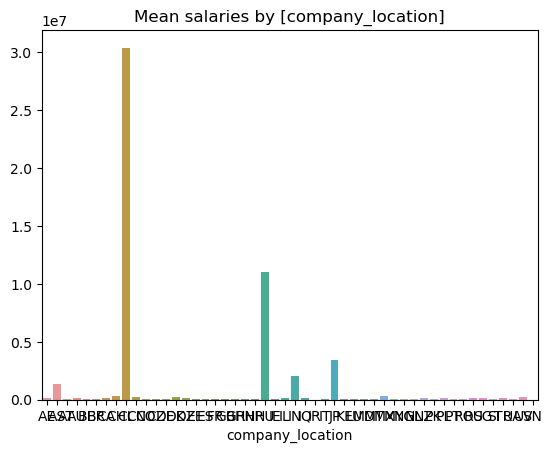

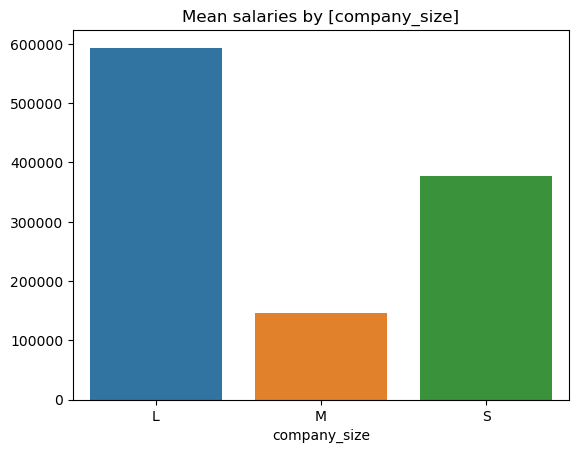

In [20]:
# Means by features
features = ['work_year', 'experience_level', 'employment_type', 'company_location', 'company_size']

for feature in features:
    summary = salaries_df.groupby(feature)['salary'].mean()
    sns.barplot(x=summary.index, y=summary.values) \
        .set(title=f'Mean salaries by [{feature}]')
    plt.show()


NameError: name 'labels' is not defined

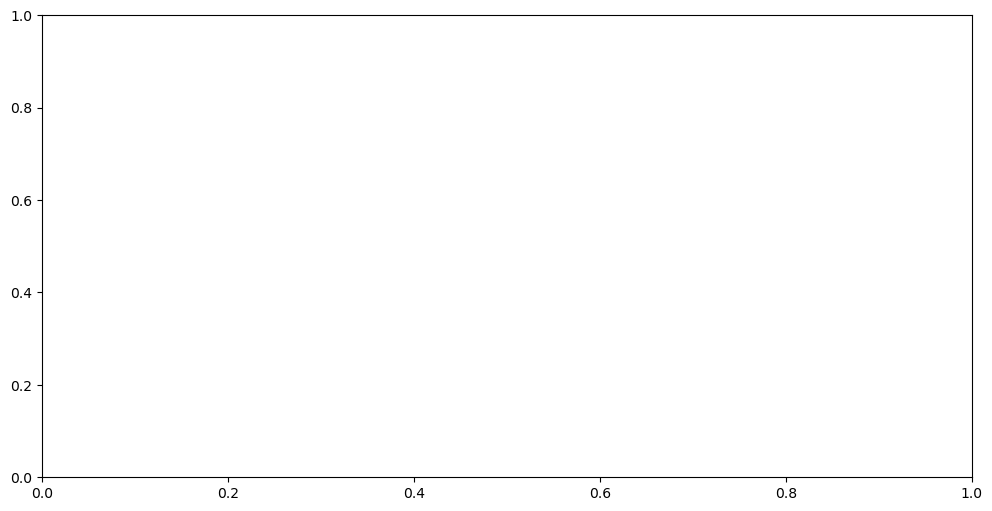

In [21]:

fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(labels))
width = 0.35
w = 0

for label in labels:
    w += (width**2)
    ax.bar_label(ax.bar(x - w/2, summary[label].tolist(), width, label=label), padding=3)
  
ax.set_title('Salaries by Year')
ax.set_ylabel('Values')
ax.set_xlabel('Years')
ax.set_xticks(x, labels)

ax.legend()

fig.tight_layout()
plt.show()